Details of Logistic Regression and Feature Exploration

In [1]:
import numpy as np # numerical computation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plotting package
%matplotlib inline
import matplotlib as mpl # plotting functionality
import seaborn as sns # a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 # provides high resolution figures

In [2]:
df = pd.read_csv('CaseStudyFile/Chapter_1_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
features_response[:5] # see the first five columns

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:] # see the last five columns

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
"""Exclude this from the analysis"""
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']

In [7]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
"""Calculate the correlation matix"""
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<Axes: >

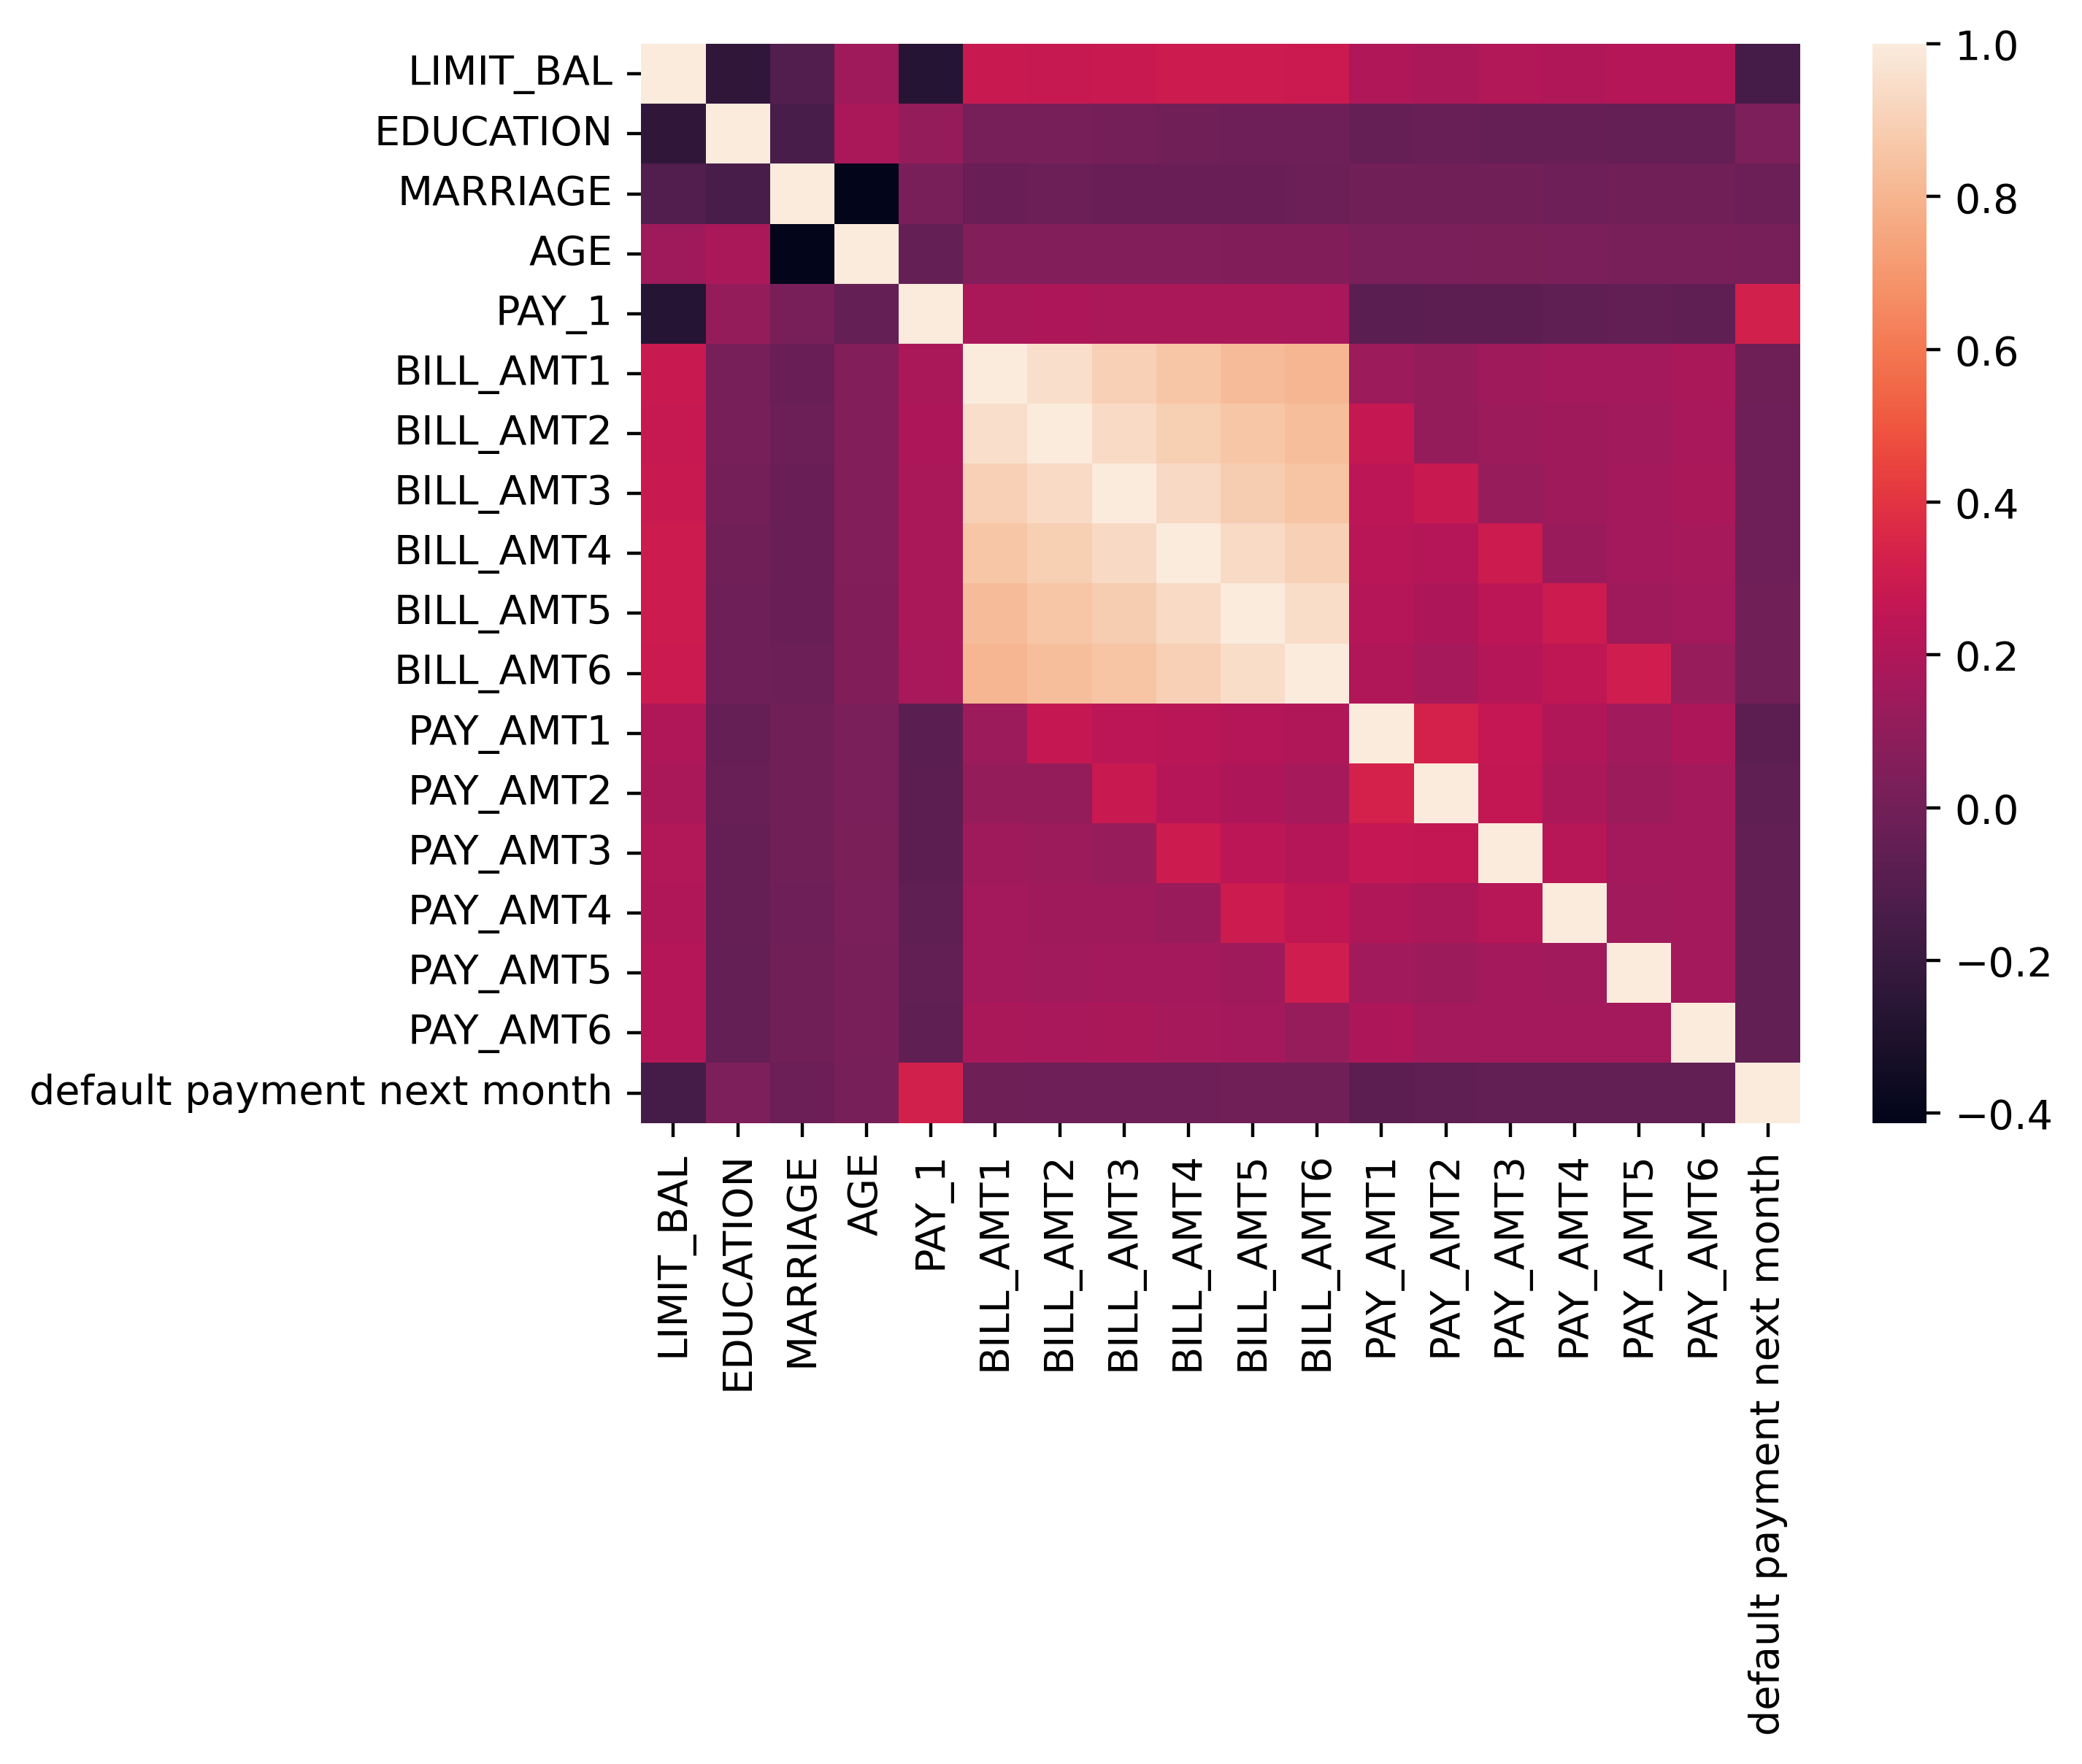

In [9]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

In [10]:
n_points = 500
np.random.seed(seed = 2)
X = np.random.uniform(low = 0.0, high = 10.0, size = (n_points,))
slope = 0.25
noise = 0.2
y = []
y.append( slope * X + np.random.normal(loc = 0.0, scale = noise, size = (n_points,)) )
y.append( -slope * X + np.random.normal(loc = 0.0, scale = noise, size = (n_points,)) )
y.append( np.random.normal(loc = 0.0, scale = noise, size = (n_points,)) )
y.append( np.sin(X/(2)* np.pi) + np.random.normal(loc = 0.0, scale = noise, size =(n_points,)) )

In [11]:
np.corrcoef(X, y[3])

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

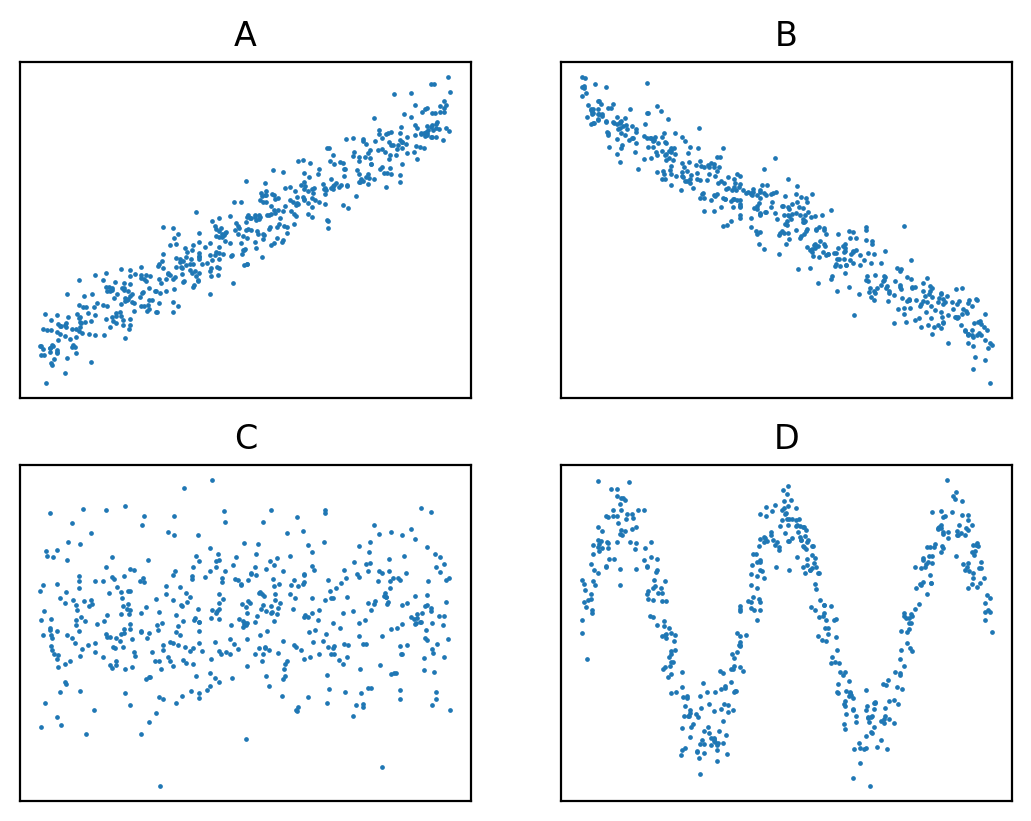

In [12]:
mpl.rcParams['figure.dpi'] = 200
fig_h, ax_h = plt.subplots(2,2)
counter = 0
correlations = []
titles = ['A', 'B', 'C', 'D']
for axis in ax_h.flatten():
    axis.scatter(X,y[counter],s = 0.5)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(titles[counter])
#     axis.set_title( r'$\rho = ${:0.2f}'.format(np.corrcoef(X, y[counter])[0,1]))
    correlations.append(np.corrcoef(X, y[counter])[0,1])
    counter += 1

In [13]:
correlations

[0.9637513276497903,
 -0.9659993956705684,
 0.06339625904219301,
 0.01900705554522924]

In [14]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [15]:
from sklearn.feature_selection import f_classif

In [16]:
[f_stat, f_p_value] = f_classif(X, y)

In [17]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1], 'F statistic': f_stat, 'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [18]:
from sklearn.feature_selection import SelectPercentile

In [19]:
selector = SelectPercentile(f_classif, percentile = 20)

In [20]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [21]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [22]:
features = features_response[:-1]

In [23]:
best_features = []
for counter in range(len(features)):
    if best_feature_ix[counter]:
        best_features.append(features[counter])

print(best_features)

#list comprehension format above script
# best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
# best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']


In [24]:
oversall_default_rate = df['default payment next month'].mean()
oversall_default_rate

0.2217971797179718

In [25]:
group_by_pay_mean_y = df.groupby('PAY_1').aggregate({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


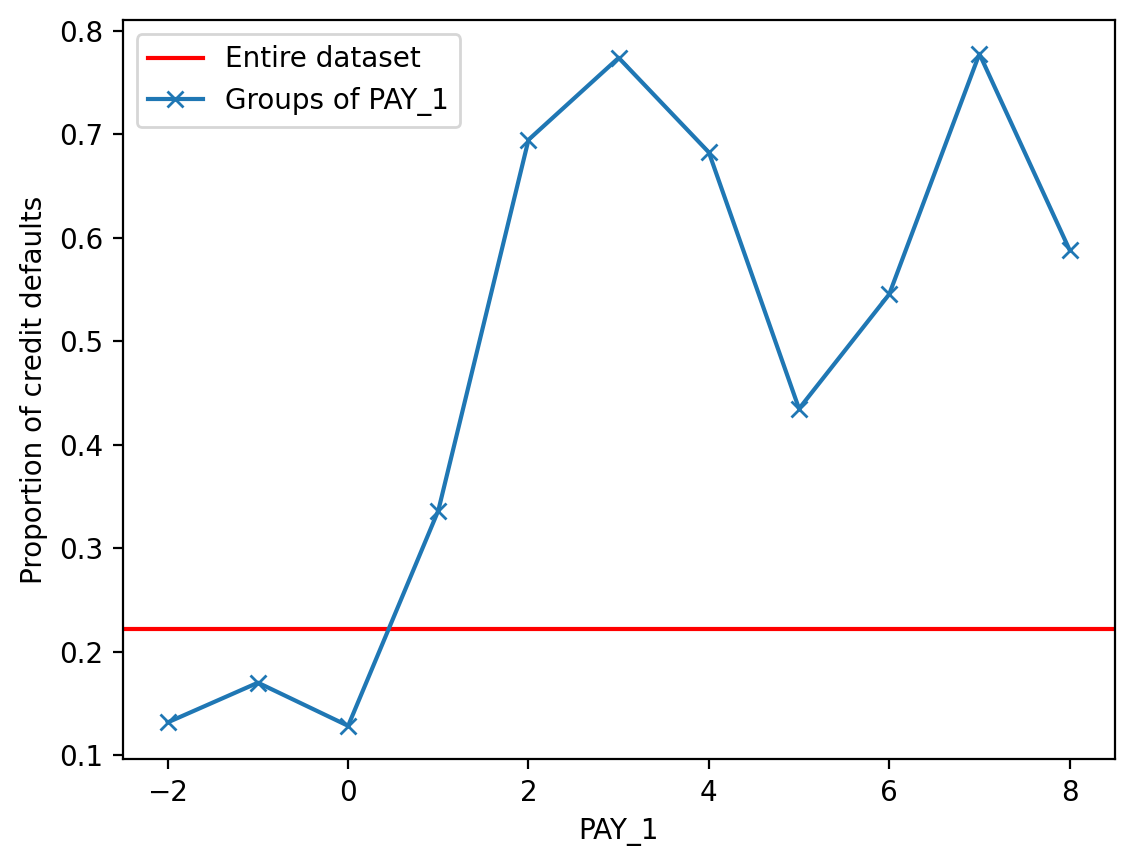

In [26]:
axes = plt.axes()
axes.axhline(oversall_default_rate, color = 'red')
group_by_pay_mean_y.plot(marker = 'x', legend = False, ax = axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])


In [27]:
positive_mask = y == 1
negative_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variables')

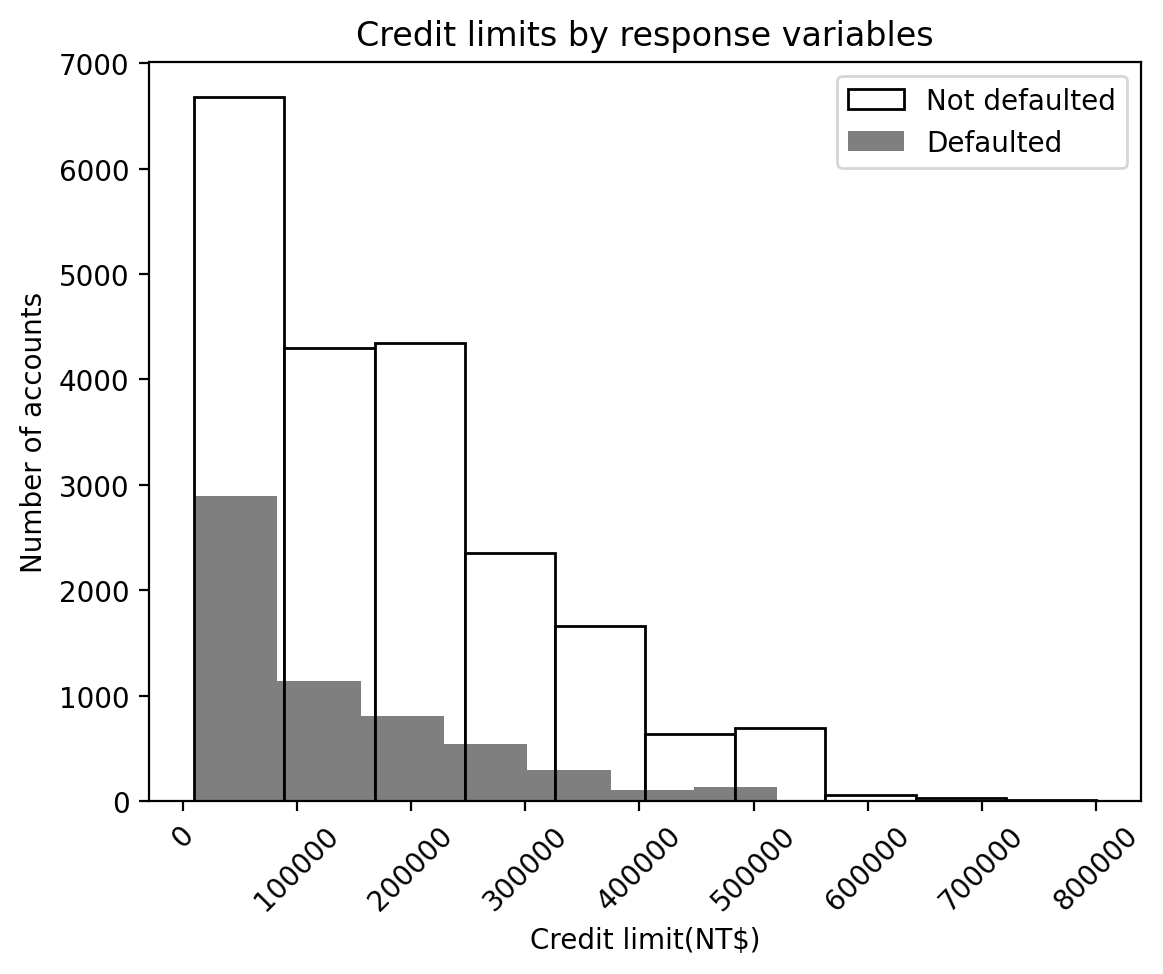

In [28]:
axes = plt.axes()
axes.hist(df.loc[negative_mask, 'LIMIT_BAL'], edgecolor = 'black', color = 'white')
axes.hist(df.loc[positive_mask, 'LIMIT_BAL'], alpha = 0.5, edgecolor = None, color = 'black')
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel('Credit limit(NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variables')

In [29]:
df['LIMIT_BAL'].max()

800000

In [30]:
bin_edges = list(range(0, 850000, 50000))
print(bin_edges)

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000]


C:\Users\HI\AppData\Local\Temp\ipykernel_11860\1661532338.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks * 50000, 2))


Text(0.5, 1.0, 'Normalized distributions of credit limit by response variable')

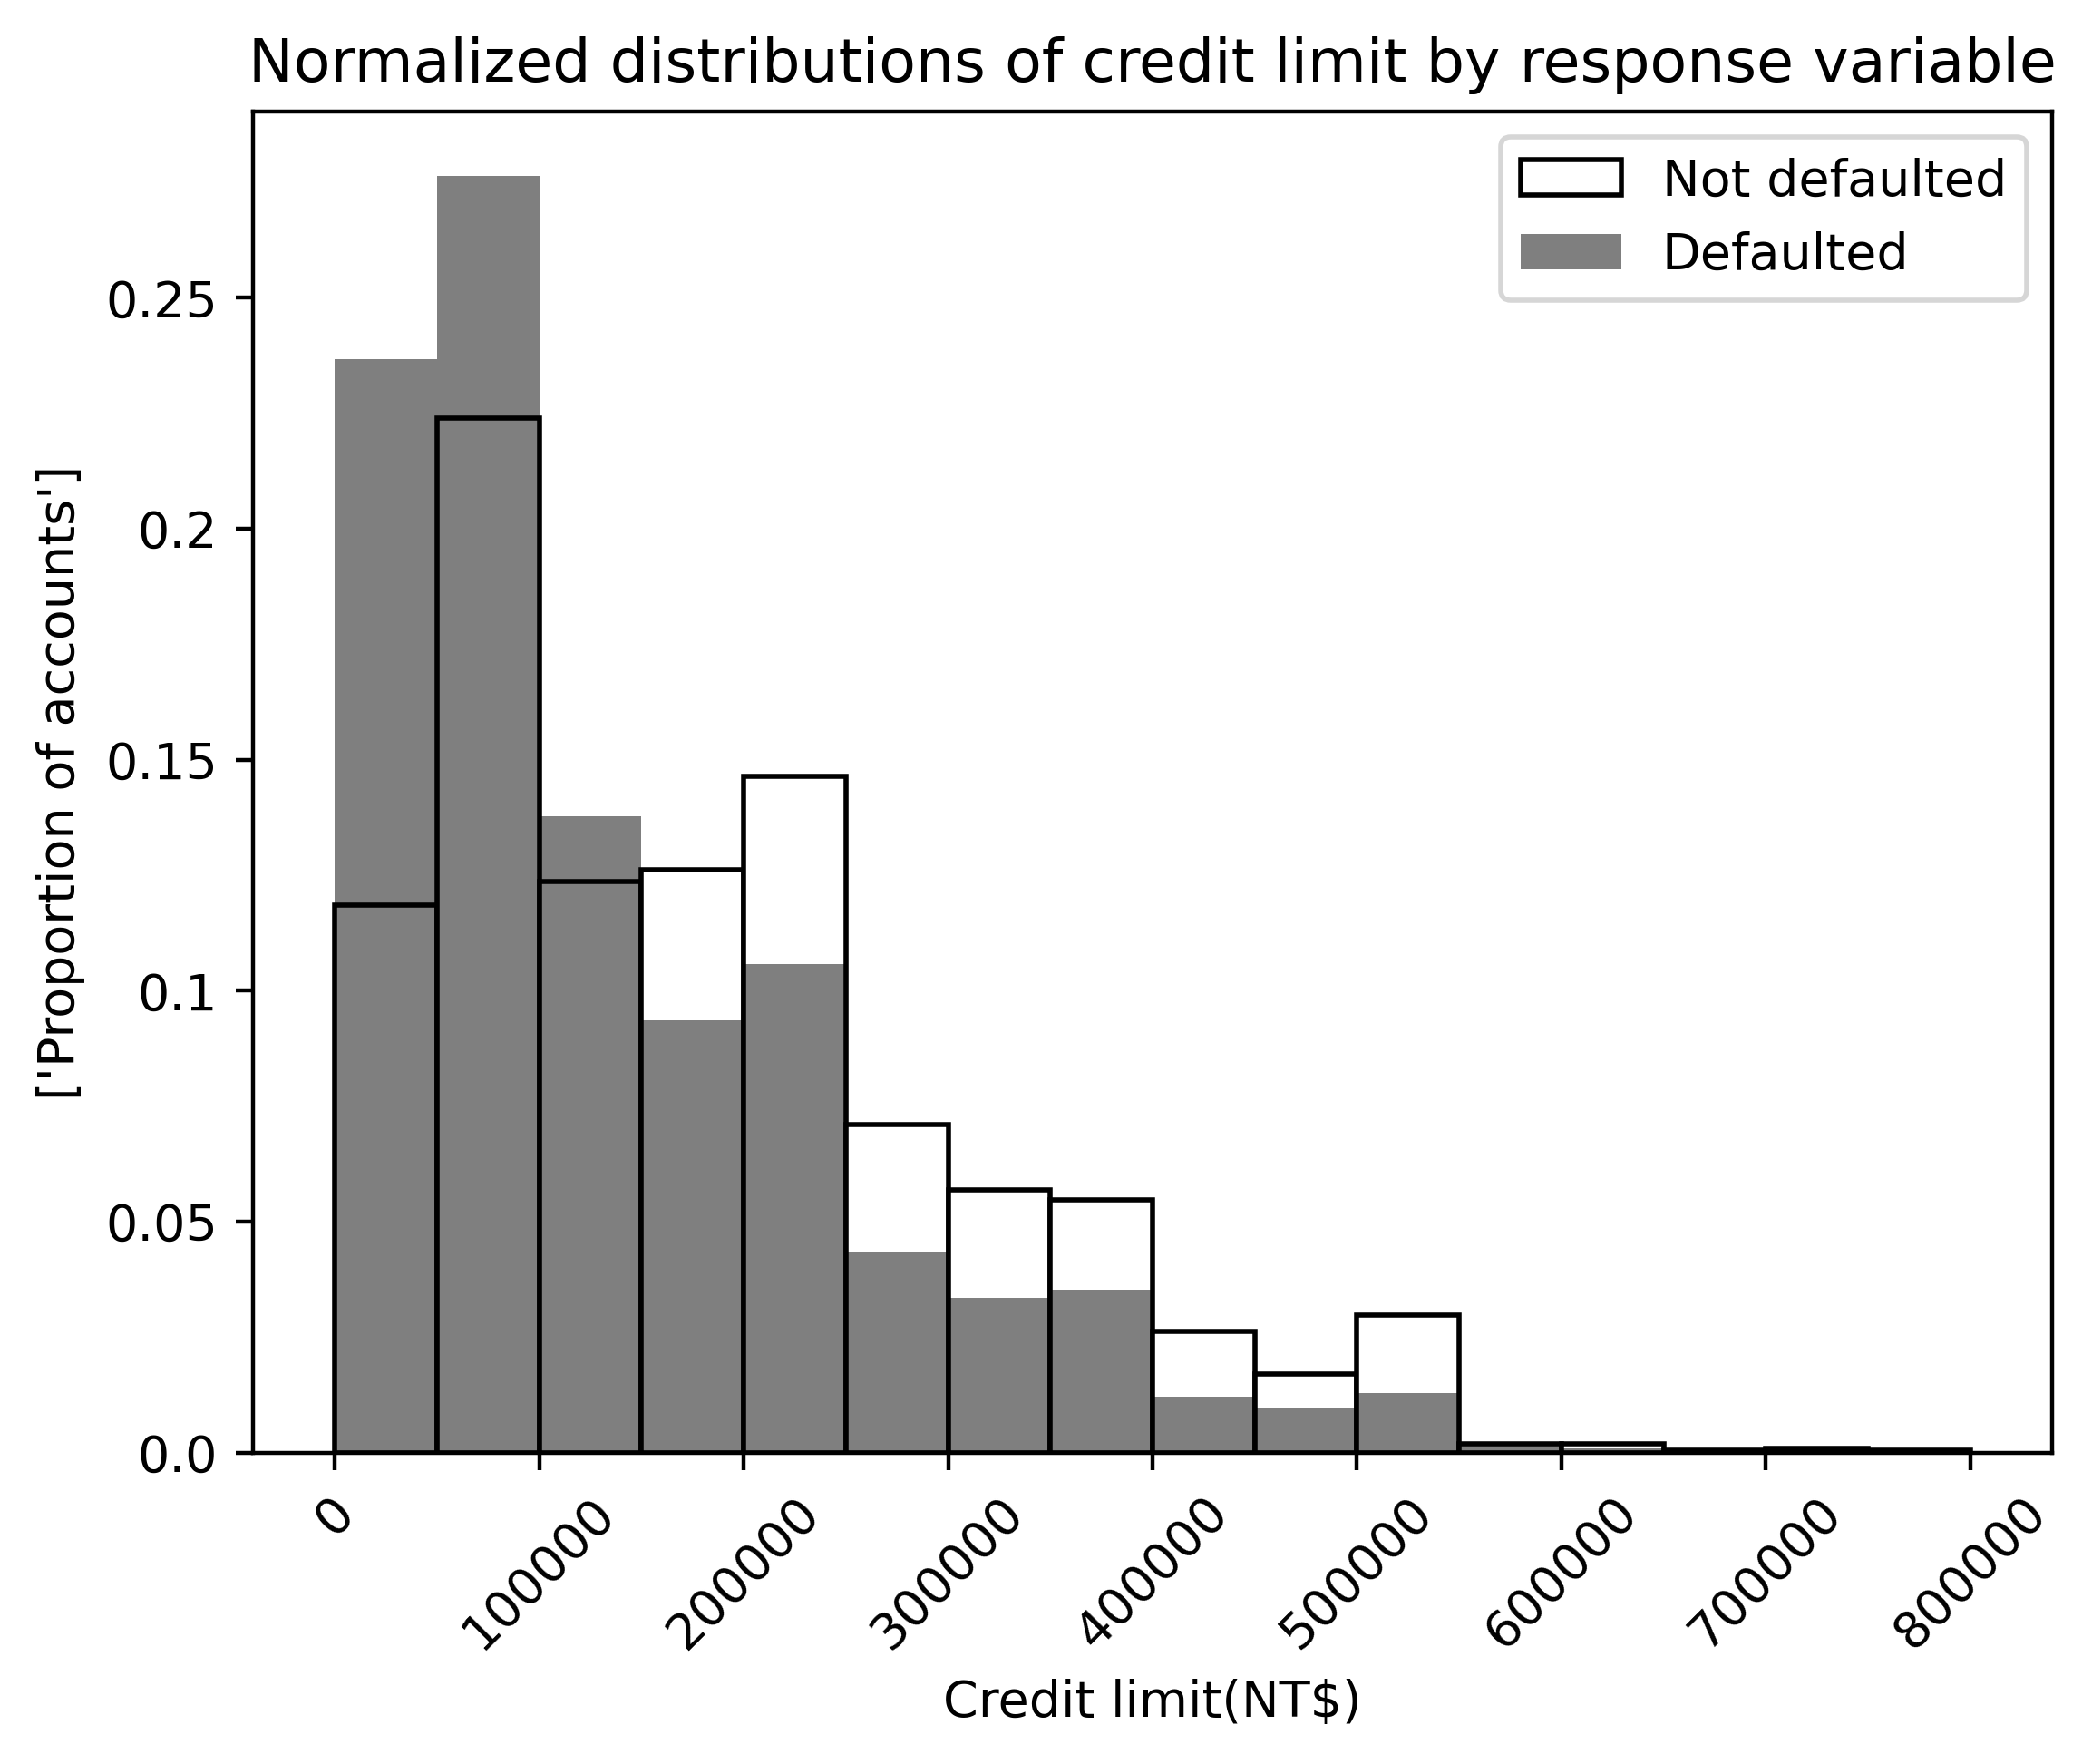

In [31]:
"""Normalizing distributions of credit limits by response variable"""
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[negative_mask, 'LIMIT_BAL'], bins = bin_edges, density = True, edgecolor = 'black', color = 'white')
axes.hist(df.loc[positive_mask, 'LIMIT_BAL'], bins = bin_edges, alpha = 0.5, edgecolor = None, color = 'black', density = True)
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_xlabel('Credit limit(NT$)')
axes.set_ylabel(['Proportion of accounts'])
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks * 50000, 2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limit by response variable')

In [32]:
"""Testing functions performance"""
def my_mean(input_args):
    output = sum(input_args )/len(input_args)
    return output

In [33]:
func_call = my_mean([1,2,3,4,5])
print(func_call)
new_func_call = my_mean(input_args = [1,2,3])
print(new_func_call)

3.0
2.0


In [34]:
np.exp(0)

1.0

In [35]:
X_exp = np.linspace(-4, 4, 81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [36]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Text(0.5, 1.0, 'Plot of $e^X$')

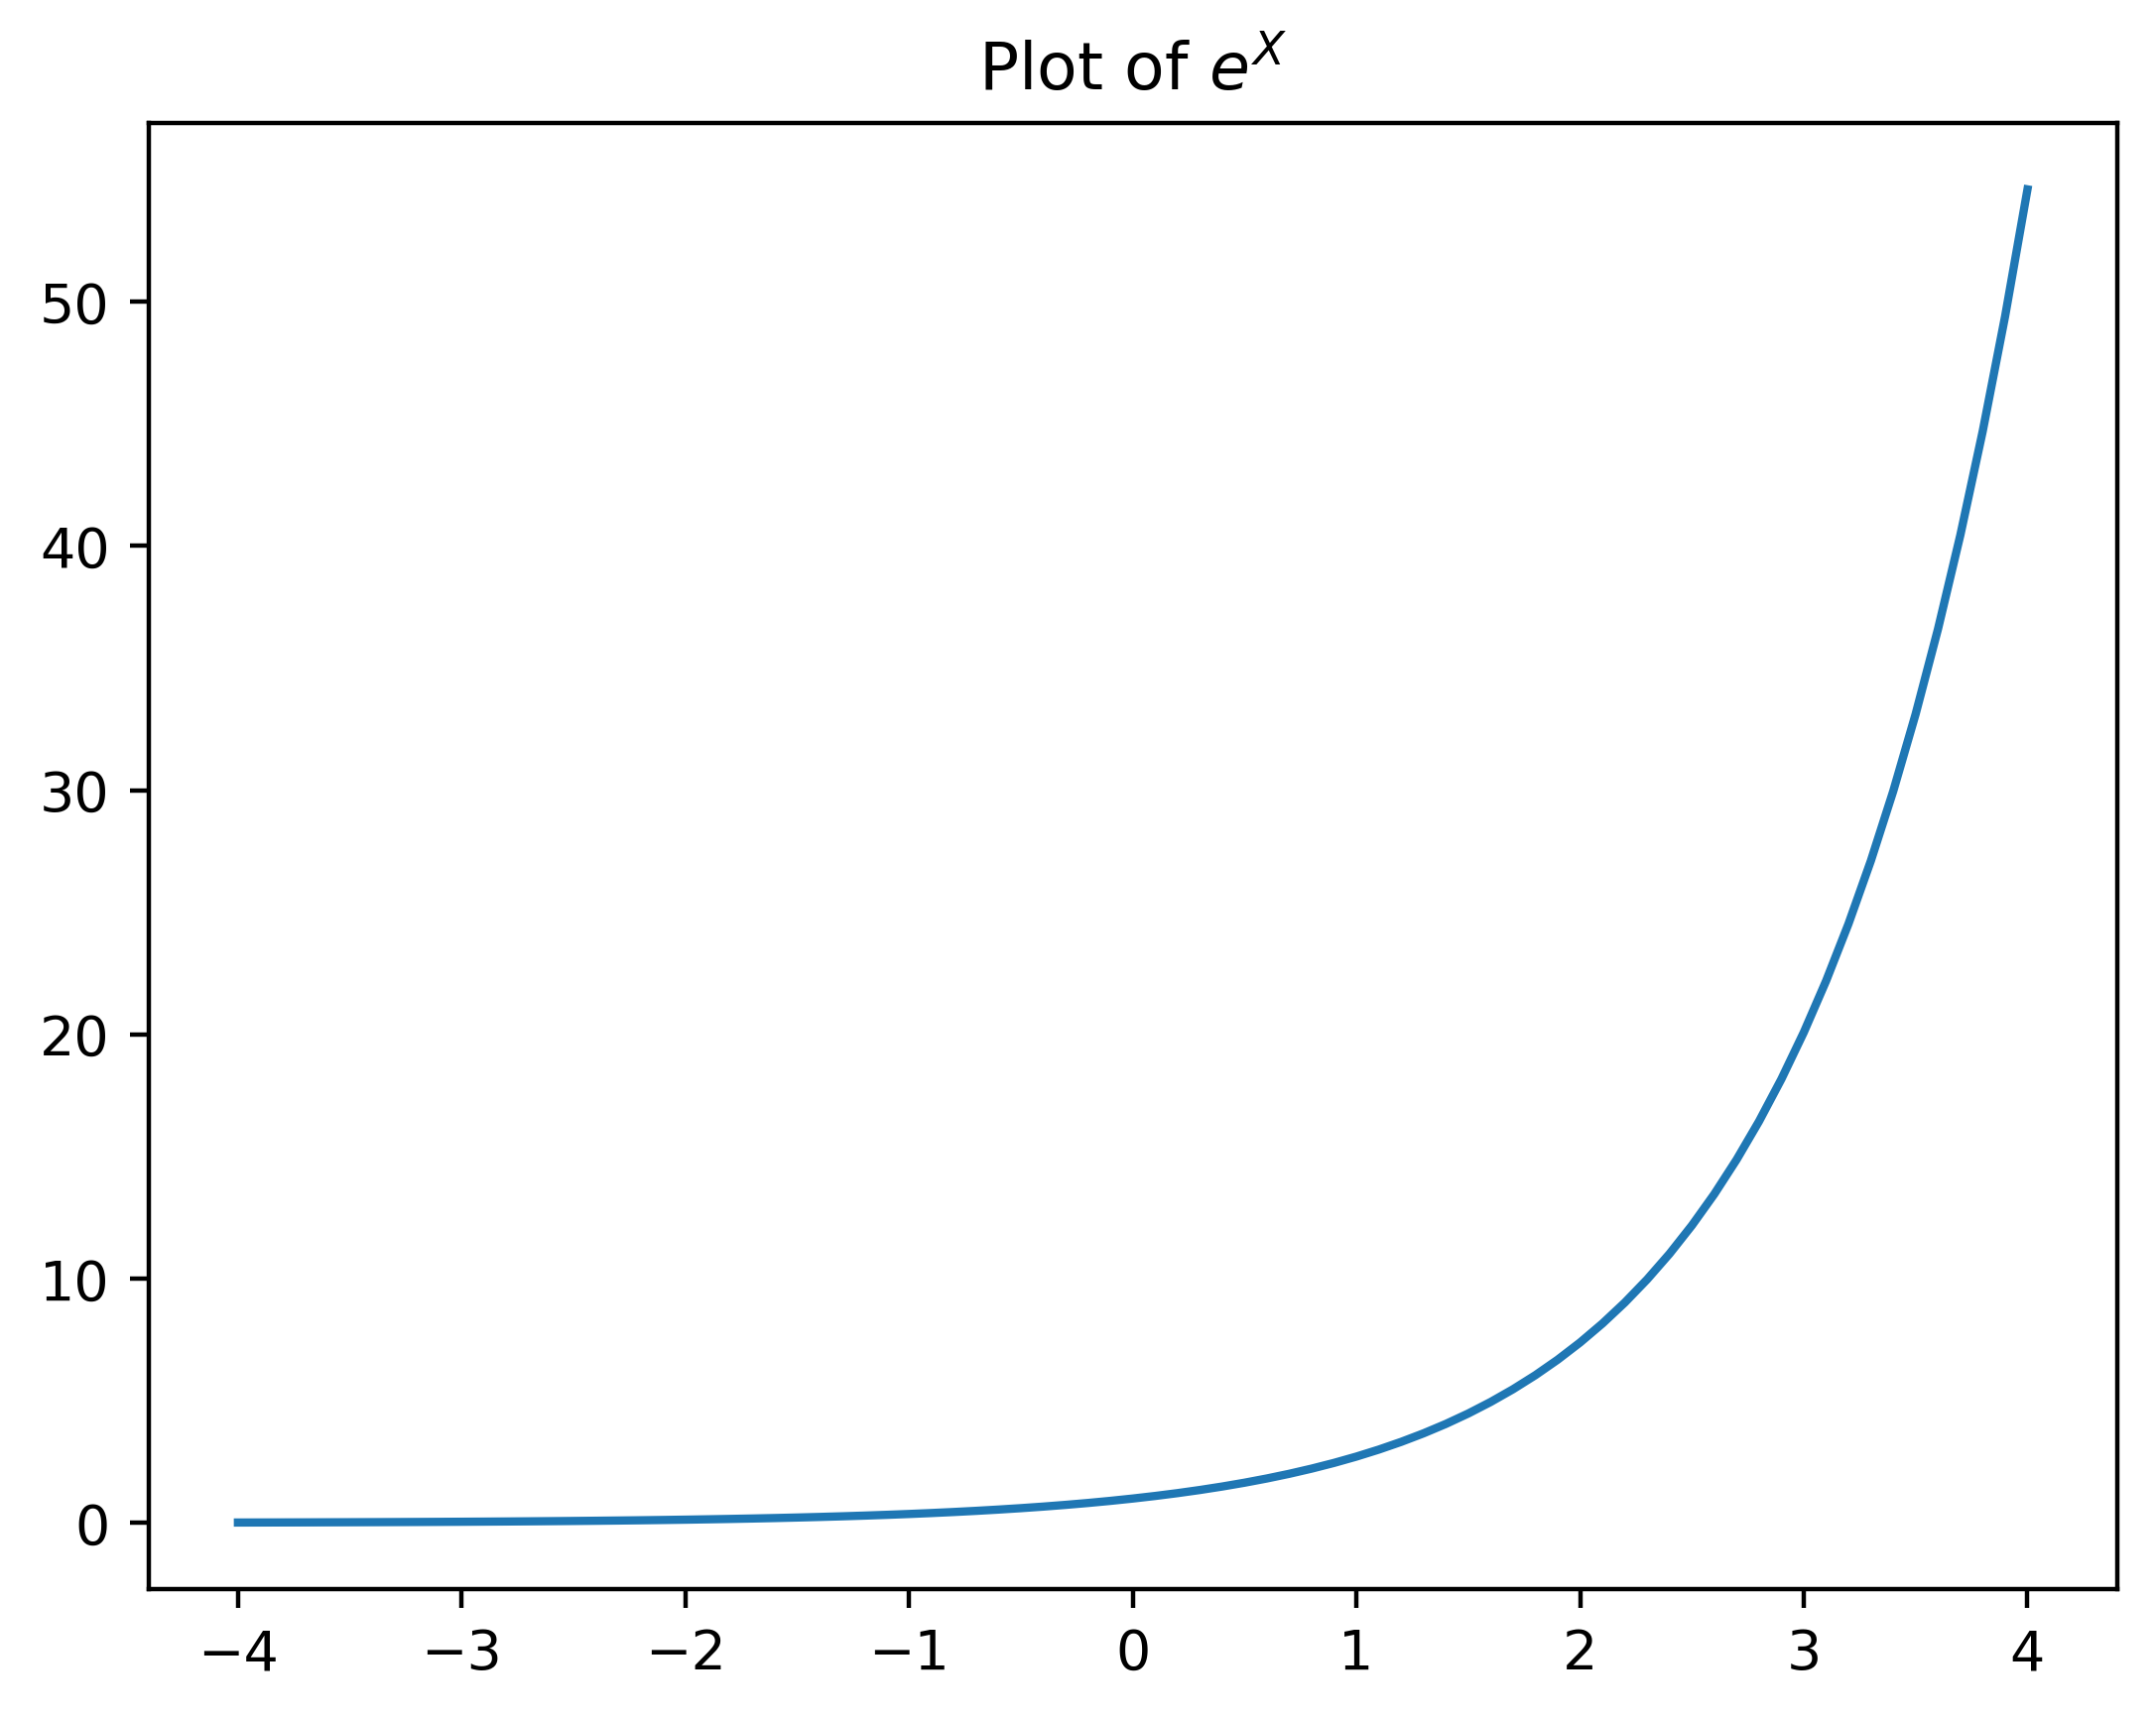

In [37]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$') #$e^X$ is called the LaTeX syntax

Text(0.5, 1.0, 'Plot of $e^{-X}$')

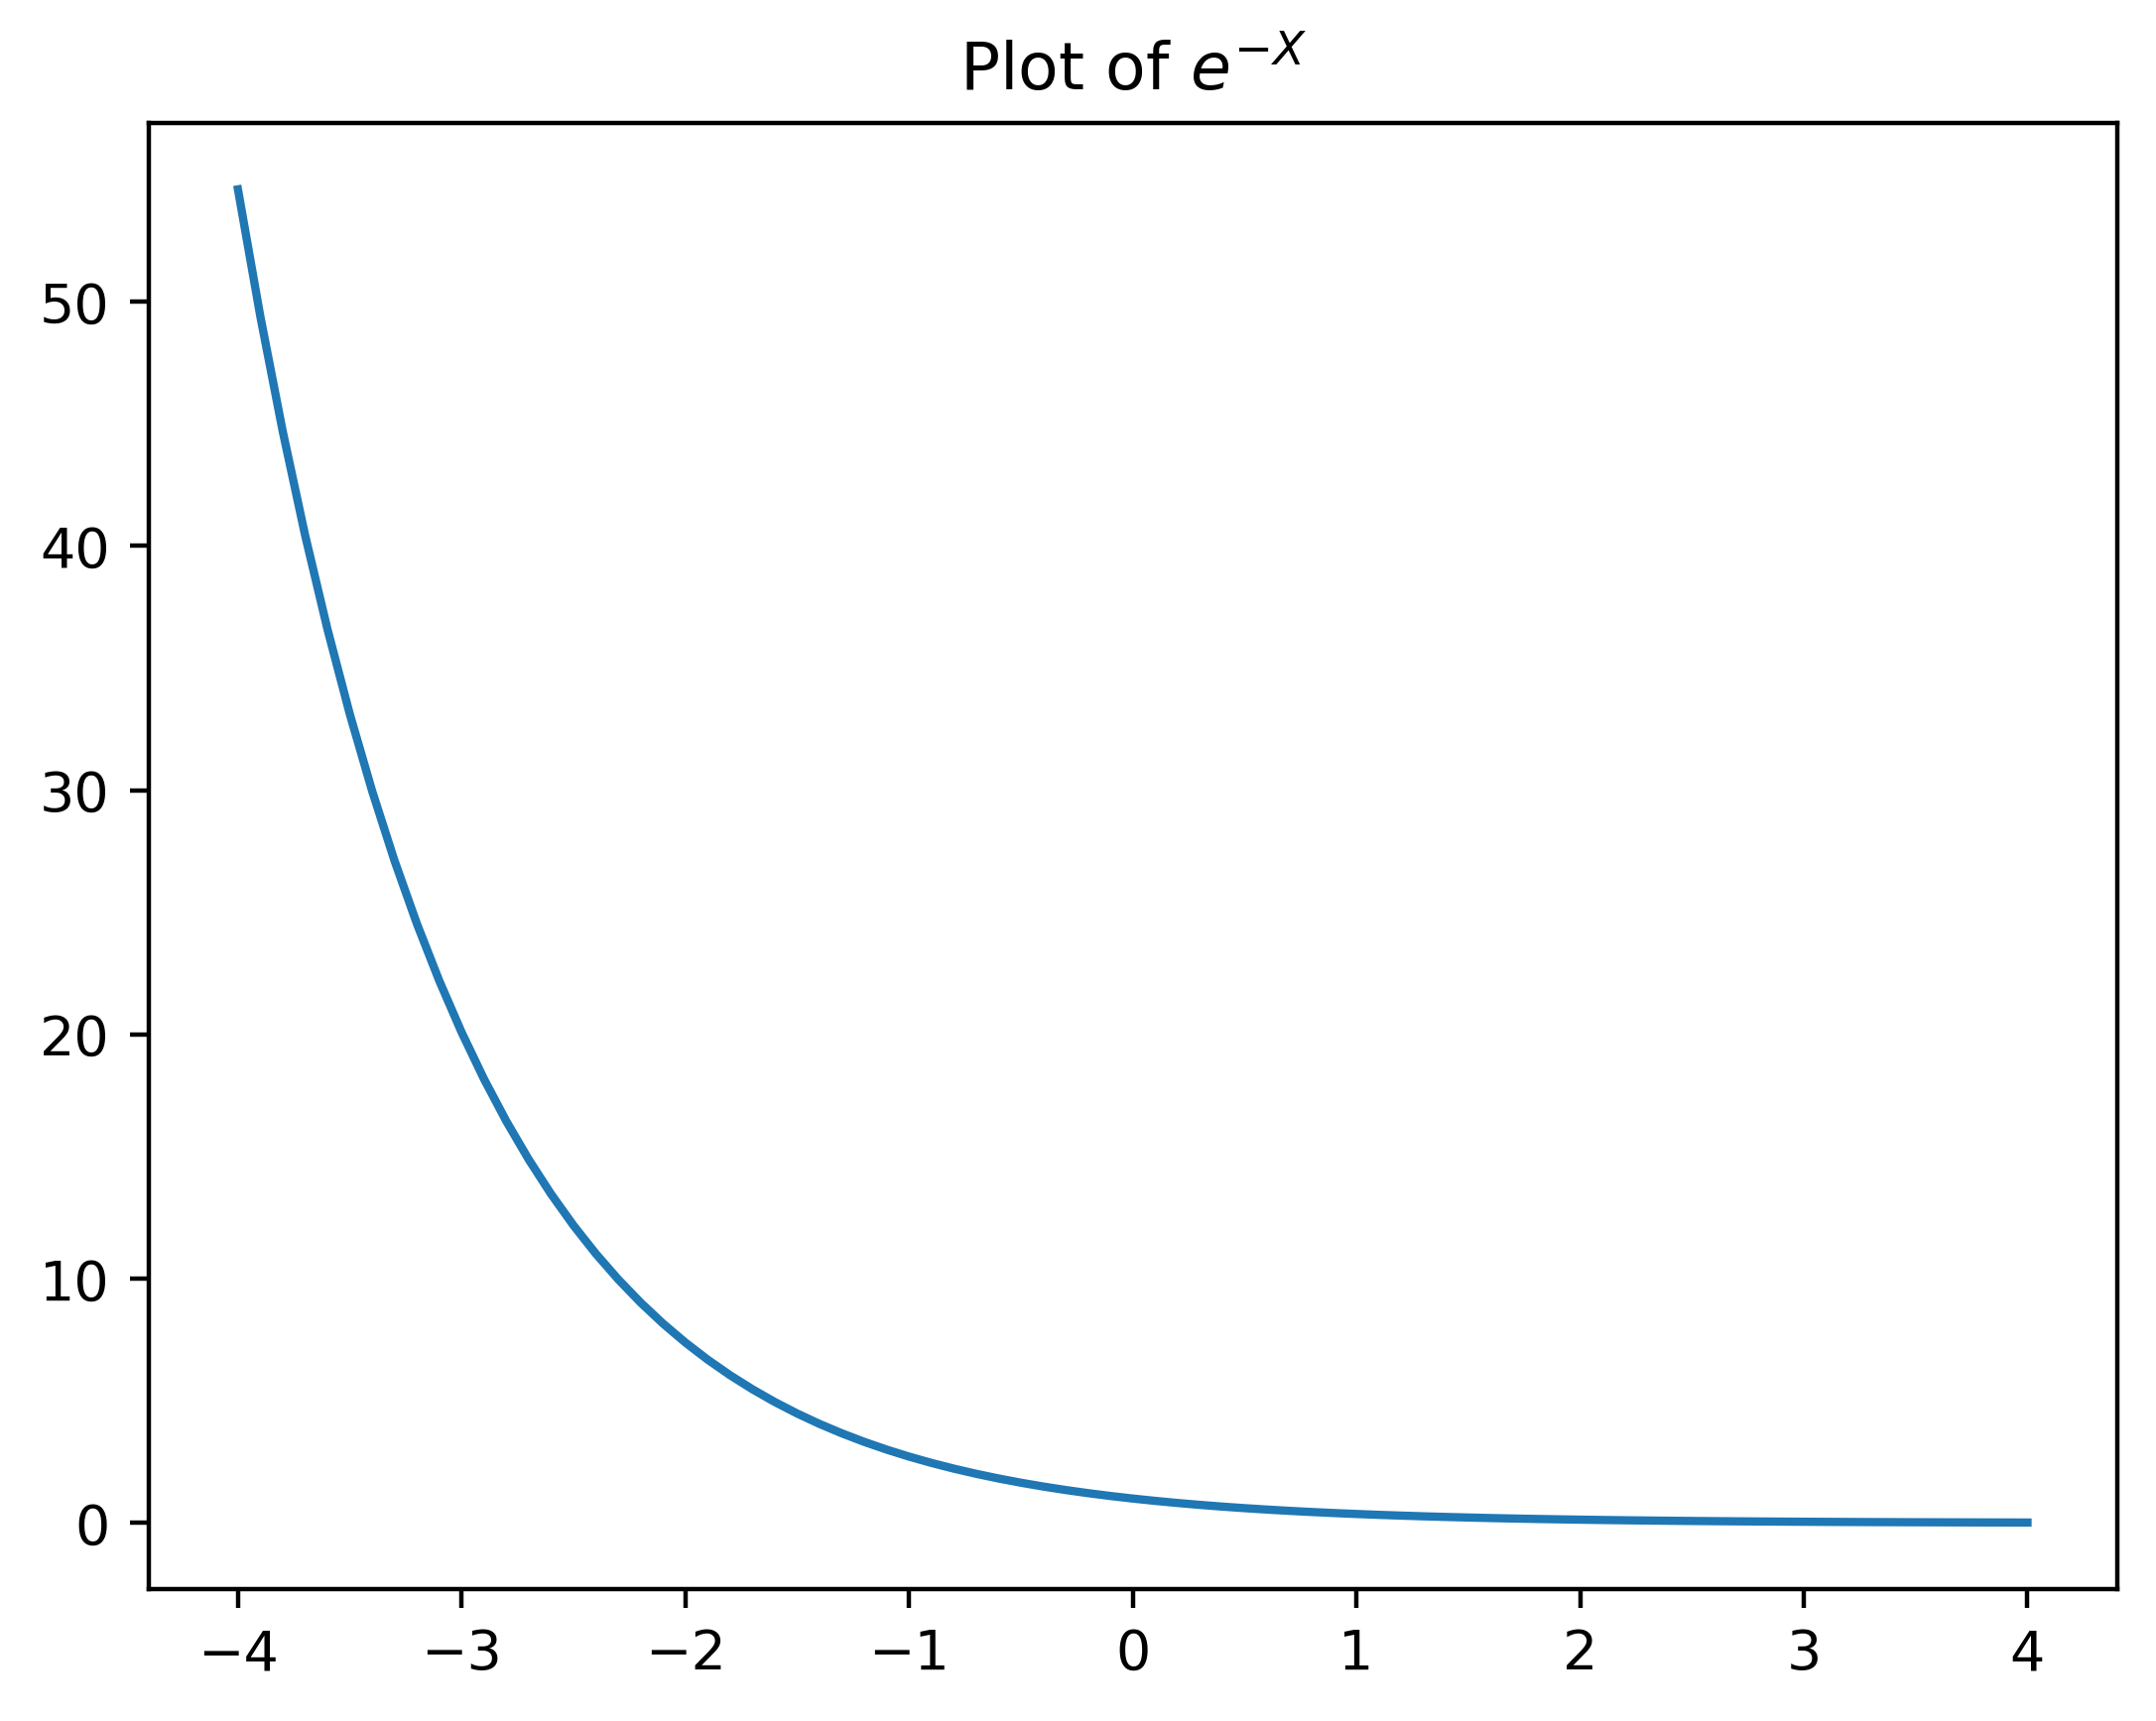

In [38]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

Text(0.5, 1.0, 'The sigmoid function')

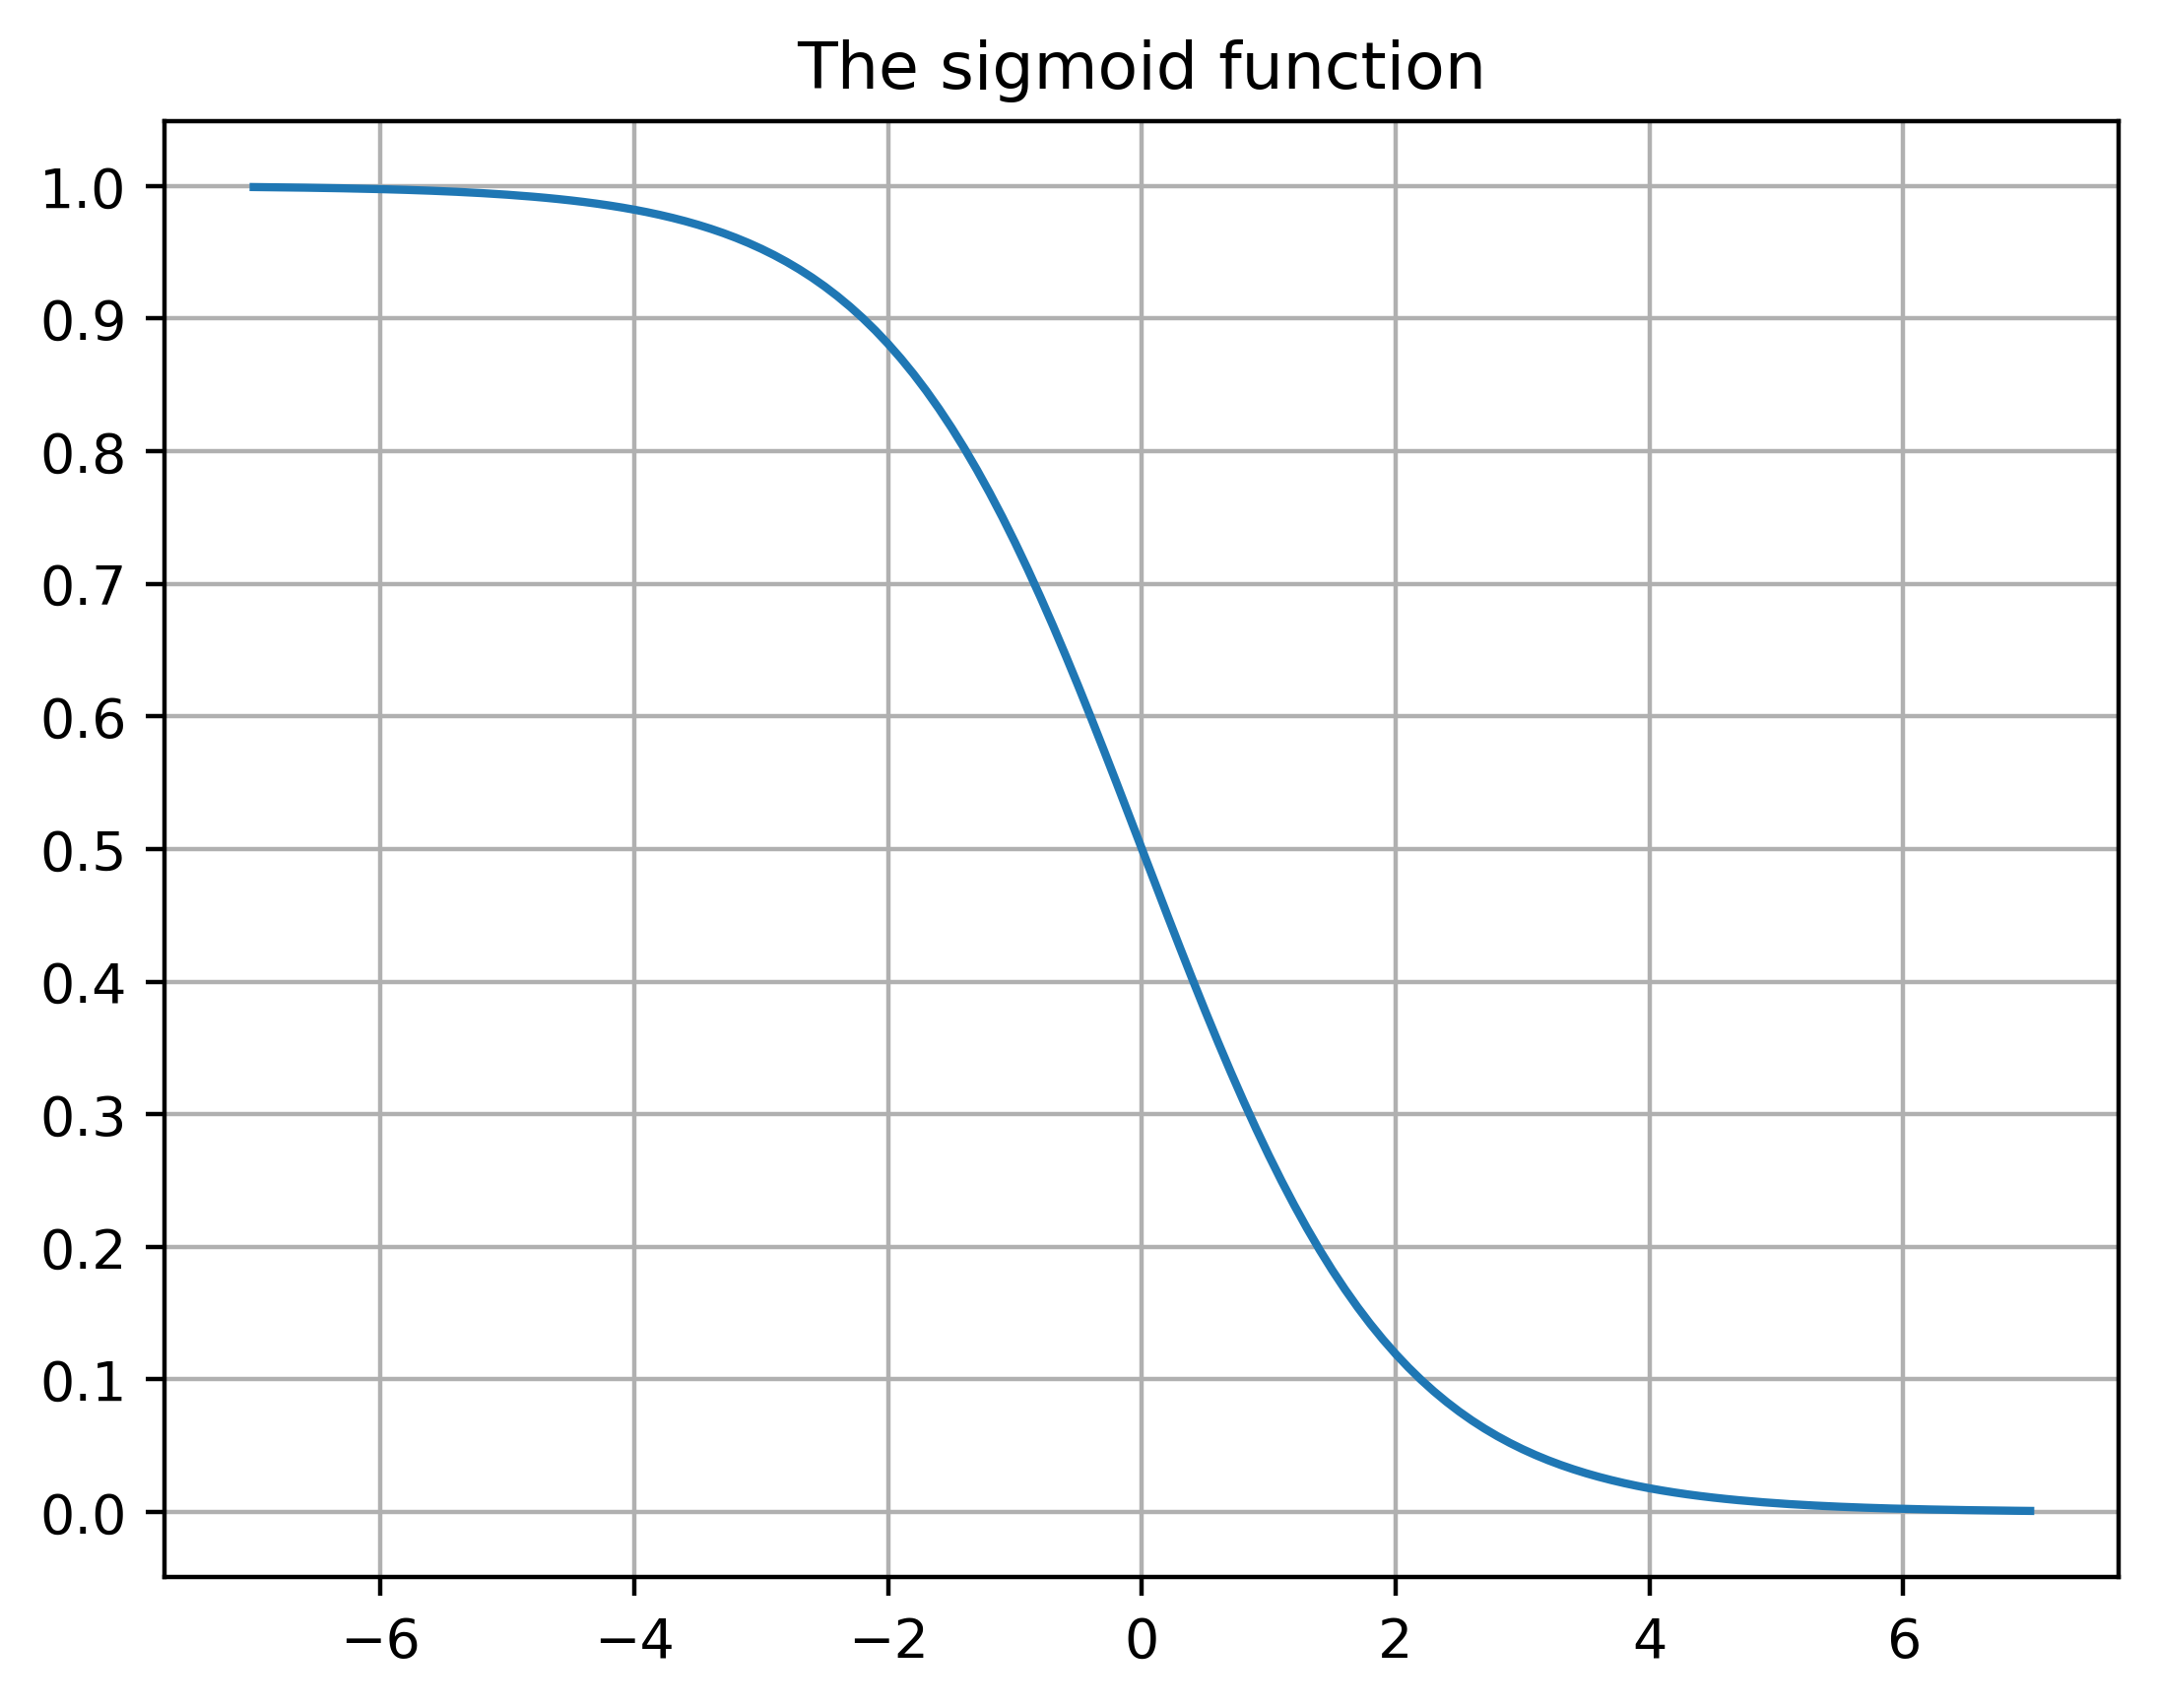

In [39]:
"""Creating the sigmoid function"""
def sigmoid(X):
    Y = 1/(1 + np.exp(X))
    return Y

X_sig = np.linspace(-7, 7, 141) # Making a larger range of x values to plot over and plot the sigmoid
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.title("The sigmoid function")

In [40]:
"""Global scope variables"""
global_scope_var = 1

In [41]:
def global_scope():
    output = global_scope_var + 1
    return(output)

In [42]:
func_call = global_scope()
func_call

2

In [43]:
group_by_pay_mean_y
p = group_by_pay_mean_y['default payment next month'].values

In [44]:
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [45]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
print(odds_ratio)
print(log_odds)

[0.15162791 0.20482215 0.14717742 0.50693161 2.27548209 3.42424242
 2.15       0.76923077 1.2        3.5        1.42857143]
[-1.88632574 -1.58561322 -1.91611649 -0.67937918  0.82219194  1.23088026
  0.76546784 -0.26236426  0.18232156  1.25276297  0.35667494]


In [46]:
print(group_by_pay_mean_y.index)

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')


Text(0.5, 0, 'Values of PAY_1')

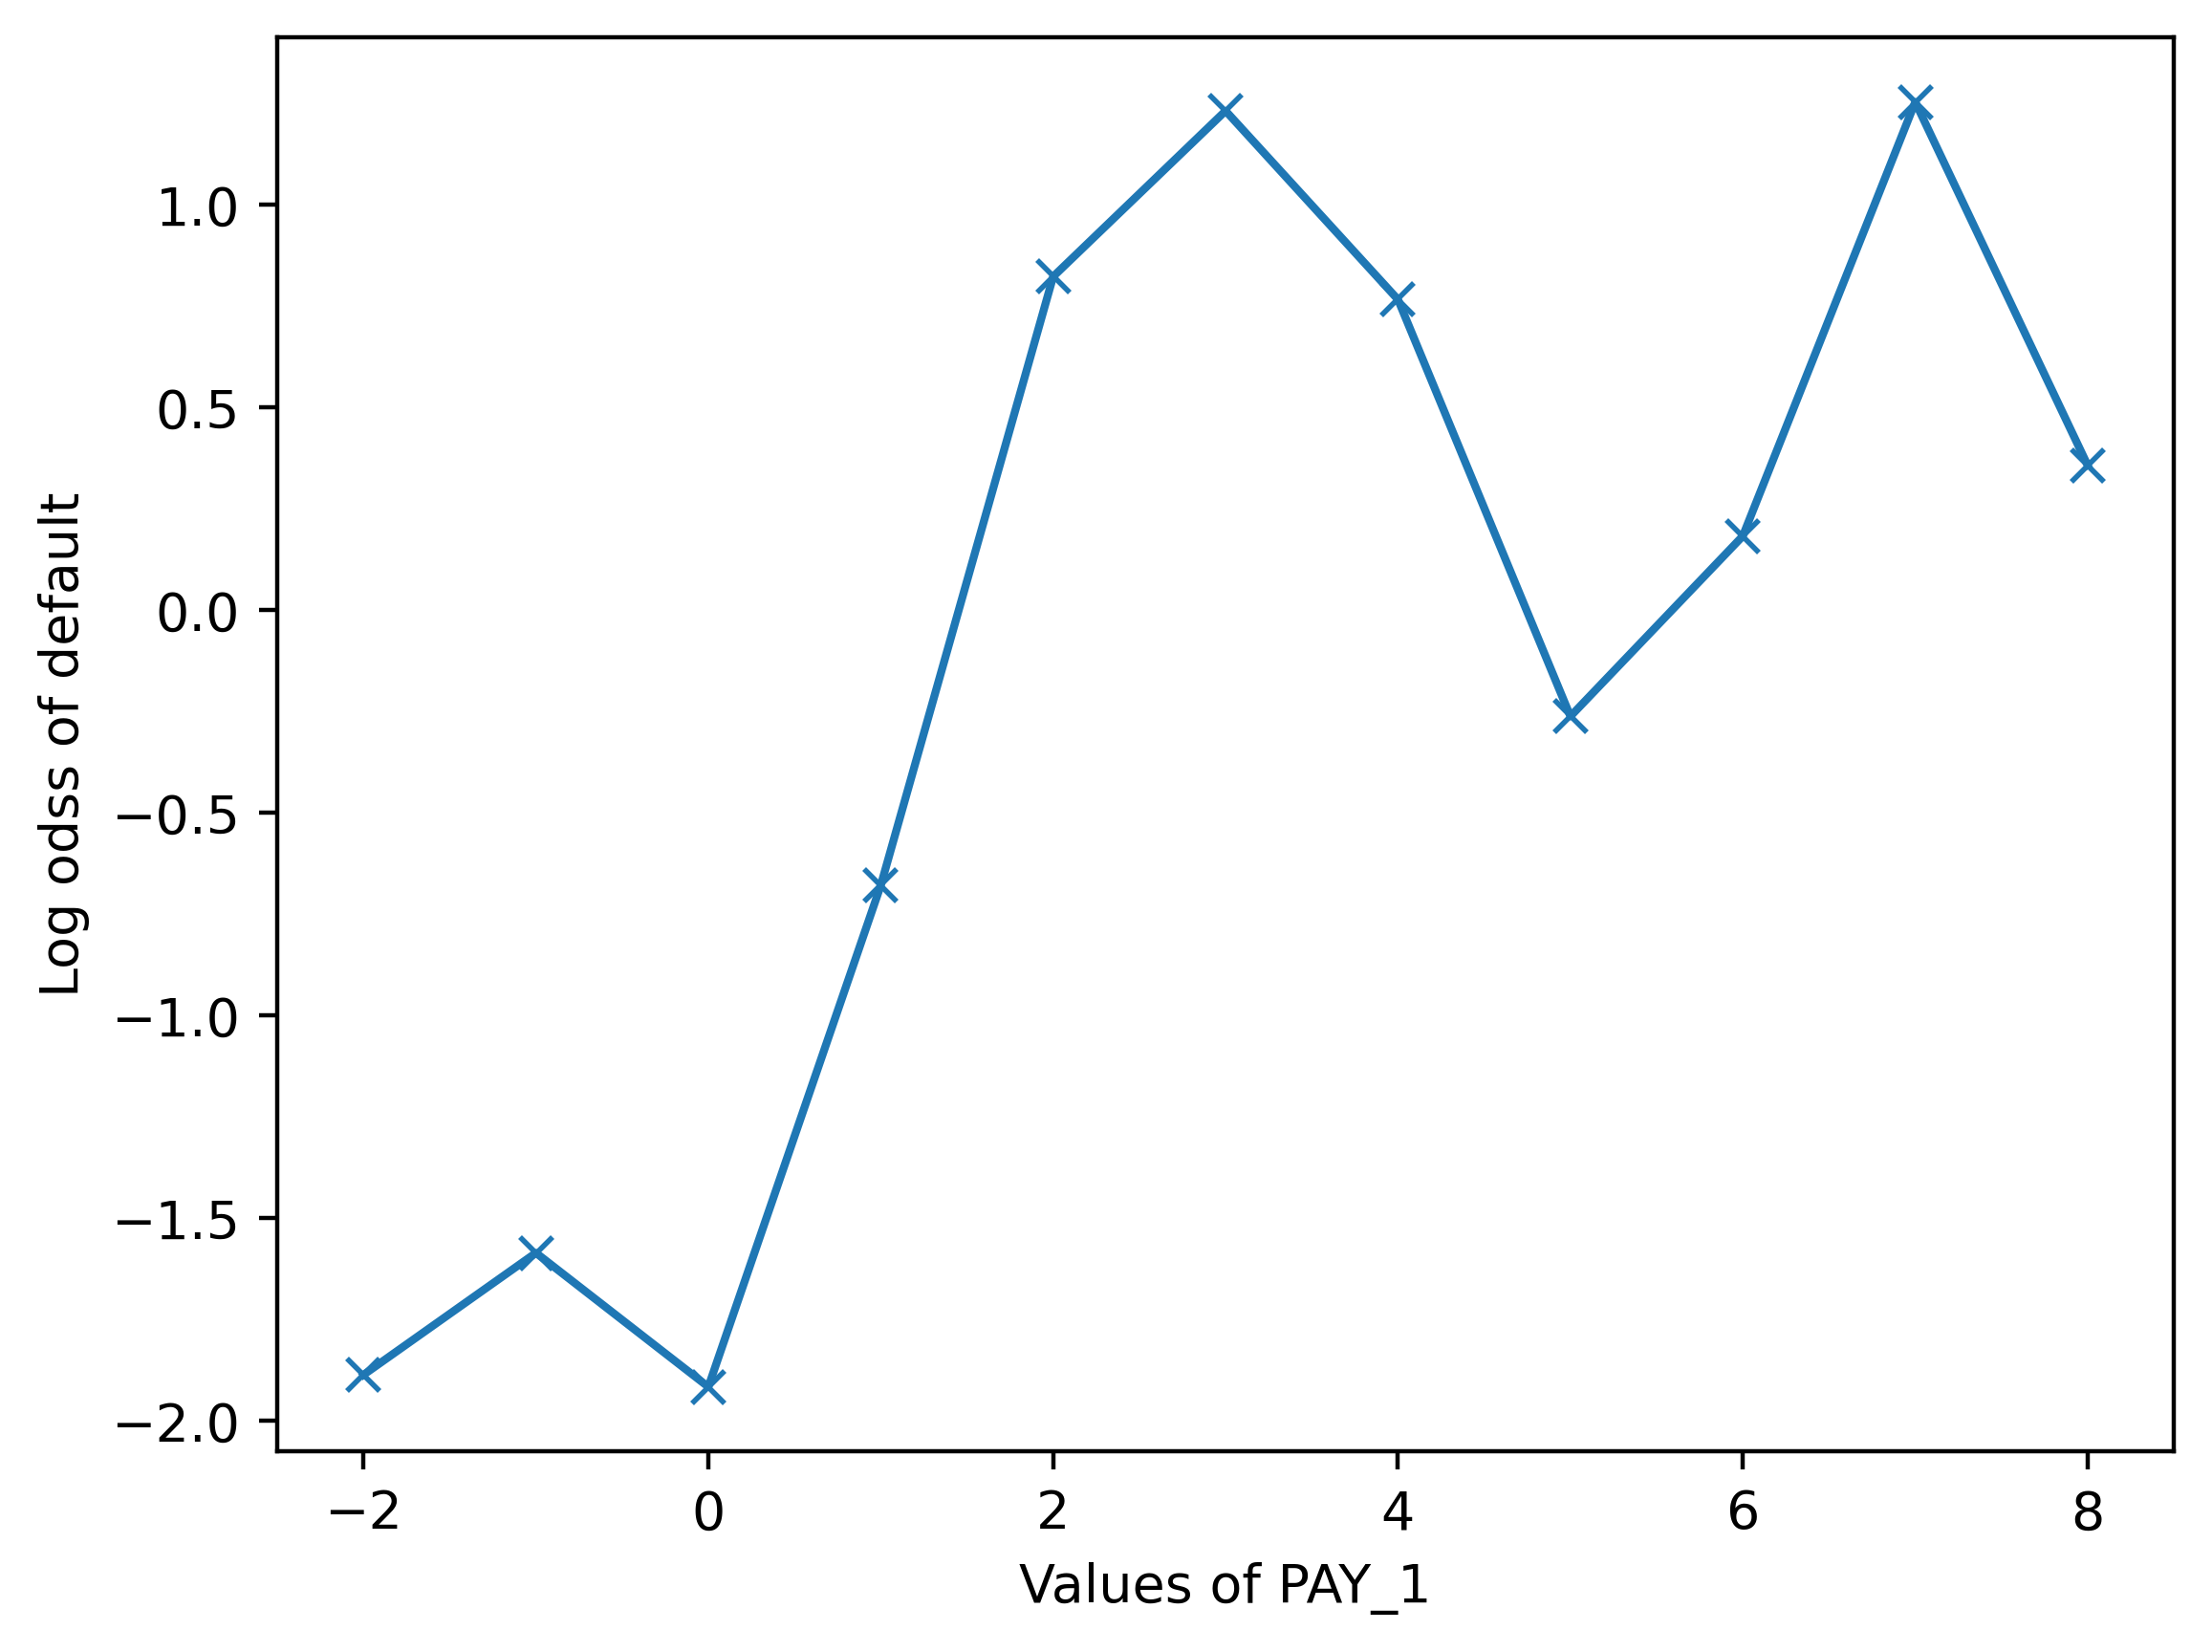

In [47]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odss of default')
plt.xlabel('Values of PAY_1')
